In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import nc

These data were taken with the stage at 140 mK and the magnet quincunx at 155 mm.

In [3]:
filename = '/data/detectors/2016-06-15_100015_sweep_stream.nc'
ncf = nc.NCFile(filename)

These data were taken at the highest readout power and showed a possible hint of device noise.

In [32]:
sss = ncf.read('SingleSweepStream6')

In [33]:
sss.set_q_and_x(deglitch=True)
sss.set_S()

In [34]:
x_color = 'blue'
q_color = 'green'

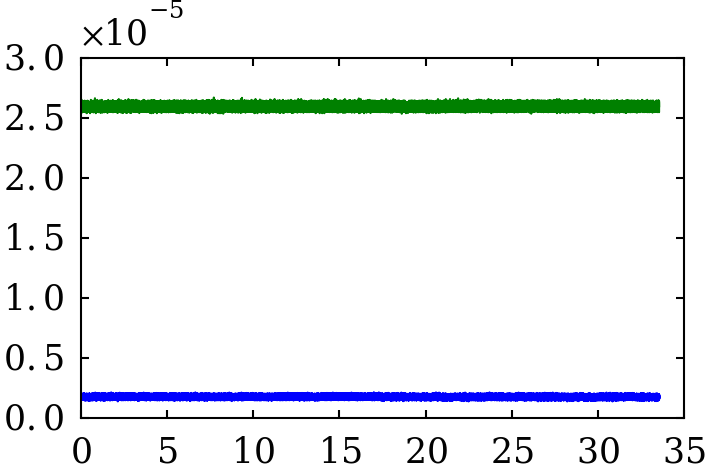

In [35]:
fig, ax = plt.subplots()
ax.plot(sss.stream.sample_time,
        sss.q,
        color=q_color)
ax.plot(sss.stream.sample_time,
        sss.x,
        color=x_color)

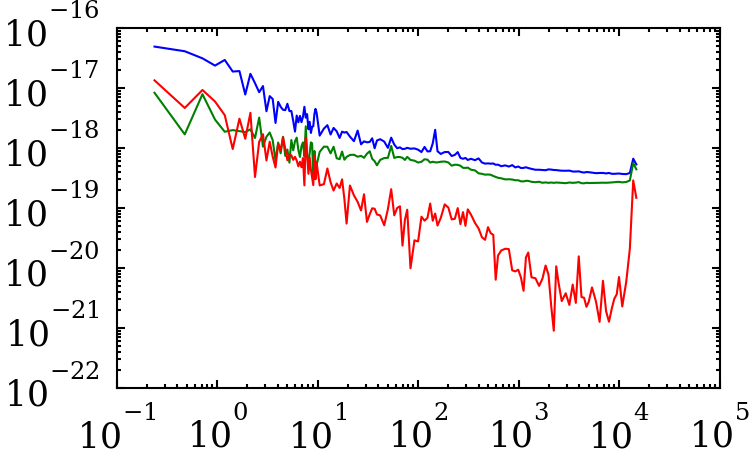

In [36]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(sss.S_frequency, sss.S_xx, color=x_color)
ax.plot(sss.S_frequency, sss.S_yy, color=q_color)
ax.plot(sss.S_frequency, np.abs(sss.S_xy), color='red')

(-1e-18, 1e-18)

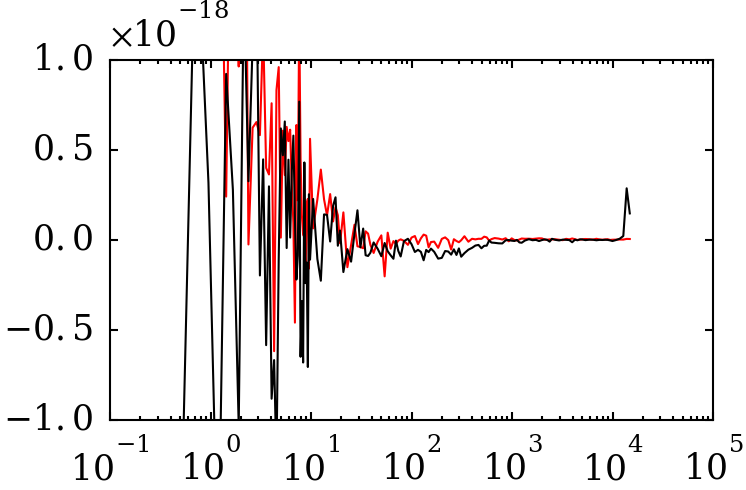

In [37]:
fig, ax = plt.subplots()
ax.set_xscale('log')

ax.plot(sss.S_frequency, sss.S_xy.real, color='red')
ax.plot(sss.S_frequency, sss.S_xy.imag, color='black')

ax.set_ylim(-1e-18, 1e-18)

(1e-21, 1e-17)

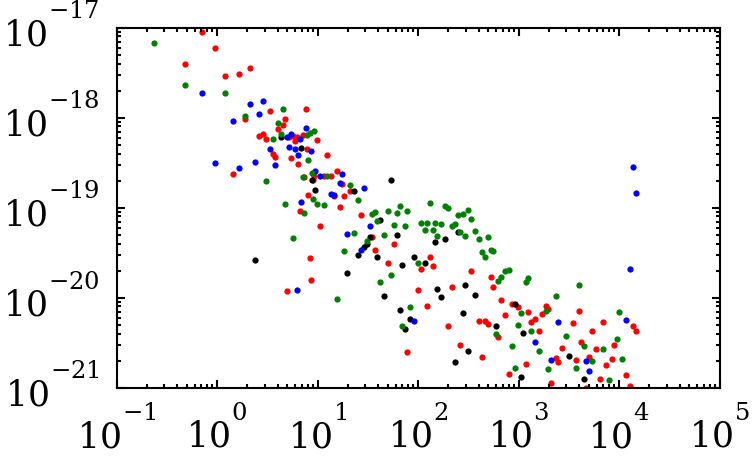

In [38]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(sss.S_frequency, sss.S_xy.real, '.', color='red')
ax.plot(sss.S_frequency, -sss.S_xy.real, '.', color='black')
ax.plot(sss.S_frequency, sss.S_xy.imag, '.', color='blue')
ax.plot(sss.S_frequency, -sss.S_xy.imag, '.', color='green')

ax.set_ylim(1e-21, 1e-17)

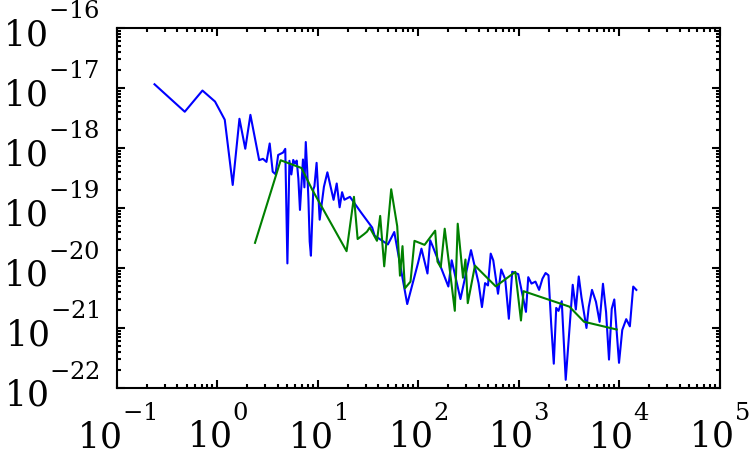

In [39]:
p_mask = sss.S_xy.real > 0
n_mask = ~p_mask

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(sss.S_frequency[p_mask],
        sss.S_xy[p_mask])
ax.plot(sss.S_frequency[n_mask],
        -sss.S_xy[n_mask])

In [40]:
f_mappable = plt.cm.ScalarMappable(norm=mpl.colors.LogNorm(vmin=sss.S_frequency.min(), vmax=sss.S_frequency.max()),
                                   cmap=plt.cm.coolwarm)

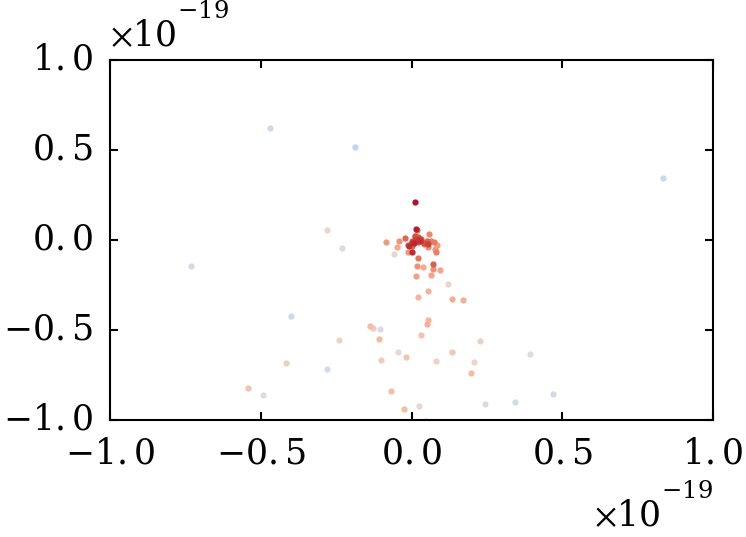

In [41]:
fig, ax = plt.subplots()
for r, i, f in zip(sss.S_xy.real, sss.S_xy.imag, sss.S_frequency):
    ax.plot(r, i, '.', color=f_mappable.to_rgba(f))

ax.set_xlim(-1e-19, 1e-19)
ax.set_ylim(-1e-19, 1e-19);